In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
forest = pd.read_csv("/content/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forest_new = forest.drop(forest.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]],axis=1)

In [5]:
forest_new.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [6]:
forest_new['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

size_category is target variable burned area of forest 

In [7]:
forest_new[forest_new.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [8]:
forest_new.drop_duplicates(inplace=True)
forest_new = forest_new.reset_index(drop=True)

In [9]:
forest_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 47.8+ KB


In [10]:
forest_new.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [11]:
numerical_columns = []
for feature in forest_new.columns:
  if forest_new[feature].dtype == "float64":
    numerical_columns.append(feature)
print(numerical_columns)

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'rain', 'area']


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in forest_new.columns:
  if forest_new[feature].dtype == "object":
    forest_new[feature] = label_encoder.fit_transform(forest_new[feature])

In [14]:
forest_new.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [16]:
#converting data frame into array
dataset = forest_new.values
dataset

array([[ 7.  ,  0.  , 86.2 , ...,  0.  ,  0.  ,  1.  ],
       [10.  ,  5.  , 90.6 , ...,  0.  ,  0.  ,  1.  ],
       [10.  ,  2.  , 90.6 , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 1.  ,  3.  , 81.6 , ...,  0.  , 11.16,  0.  ],
       [ 1.  ,  2.  , 94.4 , ...,  0.  ,  0.  ,  1.  ],
       [ 9.  ,  5.  , 79.5 , ...,  0.  ,  0.  ,  1.  ]])

In [20]:
X = dataset[:,:11]
Y = dataset[:,11]

(509, 11)

In [22]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [25]:
# Build the ANN model
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 16.3985 - accuracy: 0.4213
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 3.8943 - accuracy: 0.7444
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 2.4405 - accuracy: 0.6798
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 1.7460 - accuracy: 0.7219
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 1.2379 - accuracy: 0.7669
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.7809
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.7978
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.8343
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8764
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8848
Epoch 11

In [28]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9346
accuracy: 93.46%


In [29]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9803
accuracy: 98.03%


In [35]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88        44
         1.0       0.93      0.98      0.96       109

    accuracy                           0.93       153
   macro avg       0.94      0.90      0.92       153
weighted avg       0.94      0.93      0.93       153



recall and precision are good.

In [50]:
from keras.optimizers import Adam

learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)
# Build the ANN model
model1 = Sequential()
model1.add(Dense(12, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
15/15 [==============================] - 1s 10ms/step - loss: 7.3238 - accuracy: 0.6232 - val_loss: 1.1413 - val_accuracy: 0.7500
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7324 - val_loss: 1.4158 - val_accuracy: 0.7500
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7324 - val_loss: 1.4511 - val_accuracy: 0.7500
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.7324 - val_loss: 1.4517 - val_accuracy: 0.7500
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7324 - val_loss: 1.4541 - val_accuracy: 0.7500
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7324 - val_loss: 1.4385 - val_accuracy: 0.7500
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.7324 - val_loss: 1.4266 - val_accuracy: 0.7500
Epoch 8/100


In [52]:
# evaluate the model
scores = model1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.7190
accuracy: 71.90%


In [53]:
# evaluate the model
scores = model1.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.7388
accuracy: 73.88%


In [54]:
y_pred = model1.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [55]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        44
         1.0       0.72      1.00      0.84       109

    accuracy                           0.72       153
   macro avg       0.86      0.51      0.44       153
weighted avg       0.80      0.72      0.61       153



with learning rate 0.1 accuracy decreased

In [57]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
# Build the ANN model
model2 = Sequential()
model2.add(Dense(12, activation='relu',input_shape=(X_train.shape[1],)))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 3.1071 - accuracy: 0.5387 - val_loss: 2.0083 - val_accuracy: 0.7222
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.4650 - accuracy: 0.6901 - val_loss: 1.7282 - val_accuracy: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2390 - accuracy: 0.7183 - val_loss: 1.3387 - val_accuracy: 0.7222
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9891 - accuracy: 0.7077 - val_loss: 1.2054 - val_accuracy: 0.6389
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.6937 - val_loss: 1.0026 - val_accuracy: 0.7083
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7344 - accuracy: 0.7641 - val_loss: 1.0301 - val_accuracy: 0.6528
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.7535 - val_loss: 0.7719 - val_accuracy: 0.6667
Epoch 8/100


In [59]:
# evaluate the model
scores = model2.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9477
accuracy: 94.77%


In [60]:
# evaluate the model
scores = model2.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9831
accuracy: 98.31%


In [61]:
y_pred = model2.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [62]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        44
         1.0       0.95      0.98      0.96       109

    accuracy                           0.95       153
   macro avg       0.95      0.92      0.93       153
weighted avg       0.95      0.95      0.95       153



In [63]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

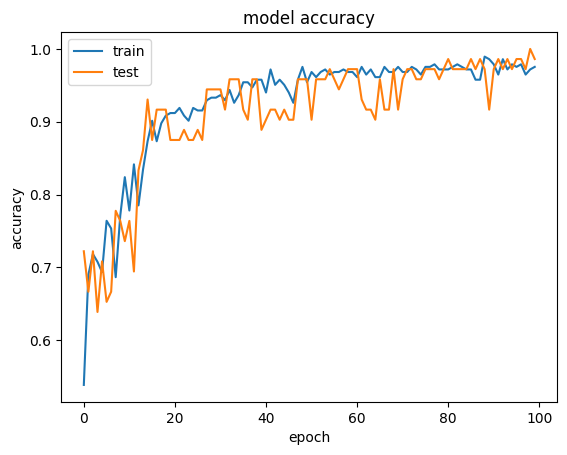

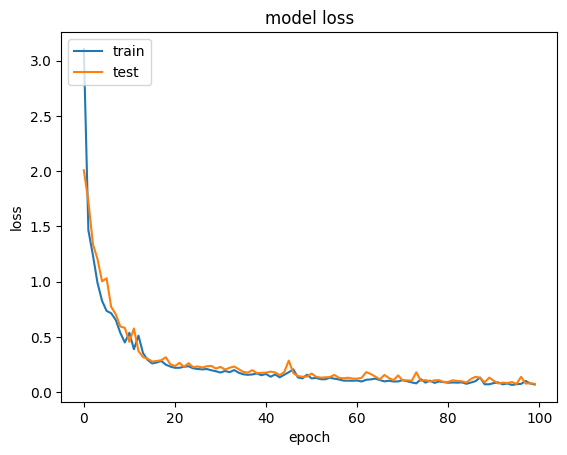

In [64]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()